In [4]:
#Import code from last time
%pylab inline
# from part2 import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [6]:
print (X.shape, y.shape)

(3, 2) (3, 1)


In [7]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [8]:
y

array([[75.],
       [82.],
       [93.]])

In [9]:
class NeuralNetwork(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forwardPropagation(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    

In [10]:
NN = NeuralNetwork()

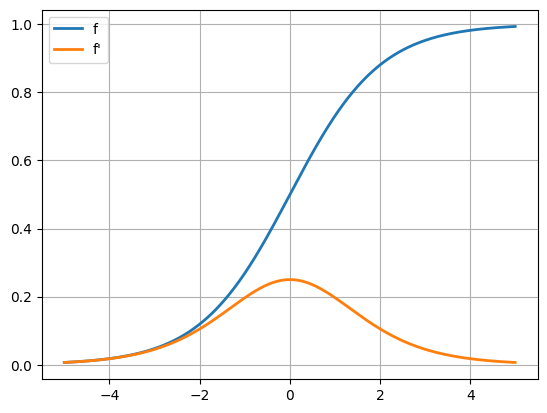

In [11]:
sigTestValues = np.arange(-5,5,0.01)
plot(sigTestValues, NN.sigmoid(sigTestValues), linewidth=2)
plot(sigTestValues, NN.sigmoidPrime(sigTestValues), linewidth=2)
grid(1)
legend(['f', "f'"])

In [12]:
class NeuralNetwork(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forwardPropagation(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
 
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forwardPropagation(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2 for a given X and y:
        self.yHat = self.forwardPropagation(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2) 
        
        return dJdW1, dJdW2
        

In [13]:
NN = NeuralNetwork()

In [14]:
cost1 = NN.costFunction(X,y)

In [15]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [16]:
dJdW1

array([[-1.11065991e+01, -2.22684767e-03, -1.13376491e+00],
       [-1.77606674e+01, -3.70133561e-03, -1.84593271e+00]])

In [17]:
dJdW2

array([[-23.1874329 ],
       [-34.49686363],
       [-12.9816835 ]])

In [18]:
learningRate = 3

In [19]:
NN.W1 = NN.W1 + learningRate*dJdW1
NN.W2 = NN.W2 + learningRate*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1, cost2)

10293.234870551976 10499.0


In [20]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - learningRate*dJdW1
NN.W2 = NN.W2 - learningRate*dJdW2
cost3 = NN.costFunction(X, y)
print (cost2, cost3)

10499.0 10499.0


C:\Users\monika201103\AppData\Local\Temp\1\ipykernel_24416\798734641.py:26: RuntimeWarning: overflow encountered in square
  return np.exp(-z)/((1+np.exp(-z))**2)
